<a href="https://colab.research.google.com/github/d93y70123123/AI/blob/master/Copy_of_02_Up_and_Running_with_pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Configuring pandas

In [0]:
# import numpy and pandas
import numpy as np
import pandas as pd

# used for dates
import datetime
from datetime import datetime, date

# Set some pandas options controlling output format
pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', 8)
pd.set_option('display.max_rows', 10)
pd.set_option('display.width', 80)

# bring in matplotlib for graphics
import matplotlib.pyplot as plt
%matplotlib inline

# The pandas Series

In [203]:
# create a four item Series
s = pd.Series([1, 2, 3, 4])
s

0    1
1    2
2    3
3    4
dtype: int64

In [204]:
# get value at label 1
s[1]

2

In [205]:
# return a Series with the row with labels 1 and 3
s[[1, 3]]

1    2
3    4
dtype: int64

In [206]:
# create a series using an explicit index
s = pd.Series([1, 2, 3, 4], 
               index = ['a', 'b', 'c', 'd'])
s

a    1
b    2
c    3
d    4
dtype: int64

In [207]:
# look up items the series having index 'a' and 'd'
s[['a', 'd']]

a    1
d    4
dtype: int64

In [208]:
# passing a list of integers to a Series that has
# non-integer index labels will look up based upon
# 0-based index like an array
s[[1, 2]]

b    2
c    3
dtype: int64

In [209]:
# get only the index of the Series
s.index

Index(['a', 'b', 'c', 'd'], dtype='object')

In [210]:
# create a Series who's index is a series of dates
# between the two specified dates (inclusive)
dates = pd.date_range('2016-04-01', '2016-04-06')
dates

DatetimeIndex(['2016-04-01', '2016-04-02', '2016-04-03', '2016-04-04',
               '2016-04-05', '2016-04-06'],
              dtype='datetime64[ns]', freq='D')

In [211]:
# create a Series with values (representing temperatures)
# for each date in the index
temps1 = pd.Series([80, 82, 85, 90, 83, 87], 
                   index = dates)
temps1

2016-04-01    80
2016-04-02    82
2016-04-03    85
2016-04-04    90
2016-04-05    83
2016-04-06    87
Freq: D, dtype: int64

In [212]:
# what's the temperation for 2016-4-4?
temps1['2016-04-04']

90

In [213]:
# create a second series of values using the same index
temps2 = pd.Series([70, 75, 69, 83, 79, 77], 
                   index = dates)
# the following aligns the two by their index values
# and calculates the difference at those matching labels
temp_diffs = temps1 - temps2
temp_diffs

2016-04-01    10
2016-04-02     7
2016-04-03    16
2016-04-04     7
2016-04-05     4
2016-04-06    10
Freq: D, dtype: int64

In [214]:
# and also possible by integer position as if the 
# series was an array
temp_diffs[2]

16

In [215]:
# calculate the mean of the values in the Series
temp_diffs.mean()

9.0

# The pandas DataFrame

In [216]:
# create a DataFrame from the two series objects temp1 and temp2
# and give them column names
temps_df = pd.DataFrame(
            {'Missoula': temps1, 
             'Philadelphia': temps2})
temps_df

            Missoula  Philadelphia
2016-04-01        80            70
2016-04-02        82            75
2016-04-03        85            69
2016-04-04        90            83
2016-04-05        83            79
2016-04-06        87            77

In [217]:
# get the column with the name Missoula
temps_df['Missoula']

2016-04-01    80
2016-04-02    82
2016-04-03    85
2016-04-04    90
2016-04-05    83
2016-04-06    87
Freq: D, Name: Missoula, dtype: int64

In [218]:
# likewise we can get just the Philadelphia column
temps_df['Philadelphia']

2016-04-01    70
2016-04-02    75
2016-04-03    69
2016-04-04    83
2016-04-05    79
2016-04-06    77
Freq: D, Name: Philadelphia, dtype: int64

In [219]:
# return both columns in a different order
temps_df[['Philadelphia', 'Missoula']]

            Philadelphia  Missoula
2016-04-01            70        80
2016-04-02            75        82
2016-04-03            69        85
2016-04-04            83        90
2016-04-05            79        83
2016-04-06            77        87

In [220]:
# retrieve the Missoula column through property syntax
temps_df.Missoula

2016-04-01    80
2016-04-02    82
2016-04-03    85
2016-04-04    90
2016-04-05    83
2016-04-06    87
Freq: D, Name: Missoula, dtype: int64

In [221]:
# calculate the temperature difference between the two cities
temps_df.Missoula - temps_df.Philadelphia

2016-04-01    10
2016-04-02     7
2016-04-03    16
2016-04-04     7
2016-04-05     4
2016-04-06    10
Freq: D, dtype: int64

In [222]:
# add a column to temp_df which contains the difference in temps
temps_df['Difference'] = temp_diffs
temps_df

            Missoula  Philadelphia  Difference
2016-04-01        80            70          10
2016-04-02        82            75           7
2016-04-03        85            69          16
2016-04-04        90            83           7
2016-04-05        83            79           4
2016-04-06        87            77          10

In [223]:
# get the columns, which is also an Index object
temps_df.columns

Index(['Missoula', 'Philadelphia', 'Difference'], dtype='object')

In [224]:
# slice the temp differences column for the rows at 
# location 1 through 4 (as though it is an array)
temps_df.Difference[1:4]

2016-04-02     7
2016-04-03    16
2016-04-04     7
Freq: D, Name: Difference, dtype: int64

In [225]:
# get the row at array position 1
temps_df.iloc[1]

Missoula        82
Philadelphia    75
Difference       7
Name: 2016-04-02 00:00:00, dtype: int64

In [226]:
# the names of the columns have become the index
# they have been 'pivoted'
temps_df.iloc[1].index

Index(['Missoula', 'Philadelphia', 'Difference'], dtype='object')

In [227]:
# retrieve row by index label using .loc
temps_df.loc['2016-04-05']

Missoula        83
Philadelphia    79
Difference       4
Name: 2016-04-05 00:00:00, dtype: int64

In [228]:
# get the values in the Differences column in tows 1, 3 and 5
# using 0-based location
temps_df.iloc[[1, 3, 5]].Difference

2016-04-02     7
2016-04-04     7
2016-04-06    10
Freq: 2D, Name: Difference, dtype: int64

In [229]:
# which values in the Missoula column are > 82?
temps_df.Missoula > 82

2016-04-01    False
2016-04-02    False
2016-04-03     True
2016-04-04     True
2016-04-05     True
2016-04-06     True
Freq: D, Name: Missoula, dtype: bool

In [230]:
# return the rows where the temps for Missoula > 82
temps_df[temps_df.Missoula > 82]

            Missoula  Philadelphia  Difference
2016-04-03        85            69          16
2016-04-04        90            83           7
2016-04-05        83            79           4
2016-04-06        87            77          10

# Loading data from a CSV file into a DataFrame

In [231]:
# display the contents of test1.csv
# which command to use depends on your OS
!head data/goog.csv # on non-windows systems
#!type data/test1.csv # on windows systems, all lines

head: cannot open 'data/goog.csv' for reading: No such file or directory


In [232]:
!wget https://raw.githubusercontent.com/PacktPublishing/Learning-Pandas-Second-Edition/master/data/goog.csv
!ls

--2020-03-12 07:56:26--  https://raw.githubusercontent.com/PacktPublishing/Learning-Pandas-Second-Edition/master/data/goog.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3602 (3.5K) [text/plain]
Saving to: ‘goog.csv.2’

goog.csv.2          100%[===================>]   3.52K  --.-KB/s    in 0s      

2020-03-12 07:56:26 (89.6 MB/s) - ‘goog.csv.2’ saved [3602/3602]

goog.csv  goog.csv.1  goog.csv.2  sample_data


In [233]:
# read the contents of the file into a DataFrame
df = pd.read_csv('goog.csv')
df

          Date        Open        High         Low       Close   Volume
0   12/19/2016  790.219971  797.659973  786.270020  794.200012  1225900
1   12/20/2016  796.760010  798.650024  793.270020  796.419983   925100
2   12/21/2016  795.840027  796.676025  787.099976  794.559998  1208700
3   12/22/2016  792.359985  793.320007  788.580017  791.260010   969100
4   12/23/2016  790.900024  792.739990  787.280029  789.909973   623400
..         ...         ...         ...         ...         ...      ...
56   3/13/2017  844.000000  848.684998  843.250000  845.539978  1149500
57   3/14/2017  843.640015  847.239990  840.799988  845.619995   779900
58   3/15/2017  847.590027  848.630005  840.770020  847.200012  1379600
59   3/16/2017  849.030029  850.849976  846.130005  848.780029   970400
60   3/17/2017  851.609985  853.400024  847.109985  852.119995  1712300

[61 rows x 6 columns]

In [234]:
# the contents of the date column
df.Date

0     12/19/2016
1     12/20/2016
2     12/21/2016
3     12/22/2016
4     12/23/2016
         ...    
56     3/13/2017
57     3/14/2017
58     3/15/2017
59     3/16/2017
60     3/17/2017
Name: Date, Length: 61, dtype: object

In [235]:
# we can get the first value in the date column
df.Date[0]

'12/19/2016'

In [236]:
# it is a string
type(df.Date[0])

str

In [237]:
# read the data and tell pandas the date column should be 
# a date in the resulting DataFrame
df = pd.read_csv('goog.csv', parse_dates=['Date'])
df

         Date        Open        High         Low       Close   Volume
0  2016-12-19  790.219971  797.659973  786.270020  794.200012  1225900
1  2016-12-20  796.760010  798.650024  793.270020  796.419983   925100
2  2016-12-21  795.840027  796.676025  787.099976  794.559998  1208700
3  2016-12-22  792.359985  793.320007  788.580017  791.260010   969100
4  2016-12-23  790.900024  792.739990  787.280029  789.909973   623400
..        ...         ...         ...         ...         ...      ...
56 2017-03-13  844.000000  848.684998  843.250000  845.539978  1149500
57 2017-03-14  843.640015  847.239990  840.799988  845.619995   779900
58 2017-03-15  847.590027  848.630005  840.770020  847.200012  1379600
59 2017-03-16  849.030029  850.849976  846.130005  848.780029   970400
60 2017-03-17  851.609985  853.400024  847.109985  852.119995  1712300

[61 rows x 6 columns]

In [238]:
# verify the type now is date
# in pandas, this is actually a Timestamp
type(df.Date[0])

pandas._libs.tslibs.timestamps.Timestamp

In [239]:
# unfortunately the index is numeric which makes
# accessing data by date more complicated
df.index

RangeIndex(start=0, stop=61, step=1)

In [240]:
# read in again, now specity the data column as being the 
# index of the resulting DataFrame
df = pd.read_csv('goog.csv', 
                 parse_dates=['Date'], 
                 index_col='Date')
df

                  Open        High         Low       Close   Volume
Date                                                               
2016-12-19  790.219971  797.659973  786.270020  794.200012  1225900
2016-12-20  796.760010  798.650024  793.270020  796.419983   925100
2016-12-21  795.840027  796.676025  787.099976  794.559998  1208700
2016-12-22  792.359985  793.320007  788.580017  791.260010   969100
2016-12-23  790.900024  792.739990  787.280029  789.909973   623400
...                ...         ...         ...         ...      ...
2017-03-13  844.000000  848.684998  843.250000  845.539978  1149500
2017-03-14  843.640015  847.239990  840.799988  845.619995   779900
2017-03-15  847.590027  848.630005  840.770020  847.200012  1379600
2017-03-16  849.030029  850.849976  846.130005  848.780029   970400
2017-03-17  851.609985  853.400024  847.109985  852.119995  1712300

[61 rows x 5 columns]

In [241]:
# and the index is now a DatetimeIndex
df.index

DatetimeIndex(['2016-12-19', '2016-12-20', '2016-12-21', '2016-12-22',
               '2016-12-23', '2016-12-27', '2016-12-28', '2016-12-29',
               '2016-12-30', '2017-01-03', '2017-01-04', '2017-01-05',
               '2017-01-06', '2017-01-09', '2017-01-10', '2017-01-11',
               '2017-01-12', '2017-01-13', '2017-01-17', '2017-01-18',
               '2017-01-19', '2017-01-20', '2017-01-23', '2017-01-24',
               '2017-01-25', '2017-01-26', '2017-01-27', '2017-01-30',
               '2017-01-31', '2017-02-01', '2017-02-02', '2017-02-03',
               '2017-02-06', '2017-02-07', '2017-02-08', '2017-02-09',
               '2017-02-10', '2017-02-13', '2017-02-14', '2017-02-15',
               '2017-02-16', '2017-02-17', '2017-02-21', '2017-02-22',
               '2017-02-23', '2017-02-24', '2017-02-27', '2017-02-28',
               '2017-03-01', '2017-03-02', '2017-03-03', '2017-03-06',
               '2017-03-07', '2017-03-08', '2017-03-09', '2017-03-10',
      

# Visualization

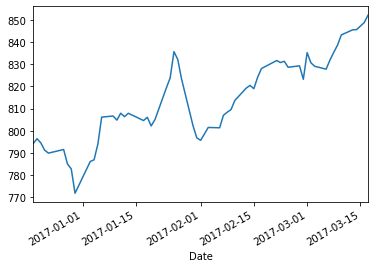

In [242]:
# plots the values in the Close column
df.Close.plot();